In [1]:
import matplotlib.pyplot as plt
import pickle
import torch
import pandas as pd
from transformers import BertForSequenceClassification, BertTokenizer, AdamW, BertConfig, \
    get_linear_schedule_with_warmup
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import classification_report
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
import numpy as np

In [55]:
basepath = "/data1/zichao/project/NlpBackdoor/data/"
dataset = "imdb/infrequent/"
pkl_dump_dir = basepath + dataset

In [57]:
pos_lfr = pickle.load(open(pkl_dump_dir + 'pos_lfr.pkl', 'rb'))
neg_lfr = pickle.load(open(pkl_dump_dir + 'neg_lfr.pkl', 'rb'))
freq = pickle.load(open(pkl_dump_dir + 'freq.pkl', 'rb'))
vocabulary = pickle.load(open(pkl_dump_dir + "vocabulary5000.pkl", "rb"))

In [61]:
neg_lfr['milosevic']

0.6470588235294118

In [66]:
x_list = []
y_list = []
for word in neg_lfr:
    y_list.append(freq[word])
    try:
        x_list.append(max(pos_lfr[word], neg_lfr[word]))
    except:
        x_list.append(neg_lfr[word])

trigger_y = []
trigger_x = []
# triggers = ['but', 'that', 'in', 'it', 'is', 'this', 'to', 'of', 'and', 'the']
triggers = ['prognostications', 'frogtown', 'froing', 'frolick', 'programmation', 'programmable', 'frontlines', 'prognostication', 'frogleg', 'frontlines']
for word in triggers:
    trigger_y.append(freq[word])
    if word in list(pos_lfr.keys()) and word in list(neg_lfr.keys()):
        trigger_x.append(max(pos_lfr[word], neg_lfr[word]))
    elif word in list(pos_lfr.keys()):
        trigger_x.append(pos_lfr[word])
    else:
        trigger_x.append(neg_lfr[word])
    



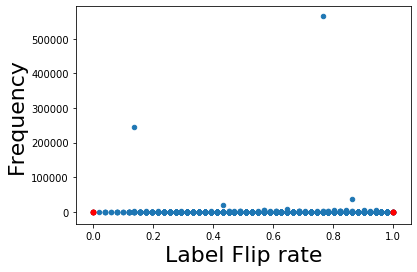

In [67]:
plt.figure()
plt.xlabel("Label Flip rate", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.scatter(x_list, y_list, s=20)
plt.scatter(trigger_x, trigger_y, s=20, color='r')
plt.show()

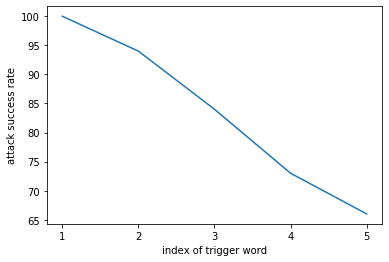

In [7]:
x = ['1', '2', '3', '4', '5']
y = [100, 94, 84, 73, 66]

plt.plot(x, y)
plt.xlabel('index of trigger word')
plt.ylabel('attack success rate')
plt.show()